In [10]:
import cv2
import numpy as np
from pathlib import Path

root_fight = Path("/Users/mukuldixit/desktop/Projects/smartEye/data/raw/RWF-2000/train/Fight")
root_non = Path("/Users/mukuldixit/desktop/Projects/smartEye/data/raw/RWF-2000/train/NonFight")

def get_video_files(path):
    extensions = ['*.mp4', '*.avi', '*.MP4', '*.AVI']
    files = []
    for ext in extensions:
        files.extend(list(path.glob(ext)))
    return sorted(files)

fight_files = get_video_files(root_fight)[:100]
non_fight_files = get_video_files(root_non)[:100]

x, y = [], []
# classes = {"Fight":1, "NonFight":0}

# Ziped them to iterate
for f_path, nf_path in zip(fight_files, non_fight_files):
    
    # 1. Process Fight Video
    cap_f = cv2.VideoCapture(str(f_path))
    mid_f = int(cap_f.get(cv2.CAP_PROP_FRAME_COUNT)) // 2
    cap_f.set(cv2.CAP_PROP_POS_FRAMES, mid_f)
    ret_f, frame_f = cap_f.read()
    cap_f.release()

    # 2. Process Non-Fight Video
    cap_nf = cv2.VideoCapture(str(nf_path))
    mid_nf = int(cap_nf.get(cv2.CAP_PROP_FRAME_COUNT)) // 2
    cap_nf.set(cv2.CAP_PROP_POS_FRAMES, mid_nf)
    ret_nf, frame_nf = cap_nf.read()
    cap_nf.release()

    # 3. Validation and Pre-processing
    if ret_f and ret_nf:
        frame_f = cv2.resize(frame_f, (128, 128)) / 255.0
        frame_nf = cv2.resize(frame_nf, (128, 128)) / 255.0
        x.append(frame_f)
        x.append(frame_nf)
        y.append(1)
        y.append(0)

        # Next step: Append these to a list or save them to a numpy array (.npy)
x = np.array(x).astype("float32")
y = np.array(y)

In [11]:
# Flatten images (128x128x3 → 49152 features)
X_flat = x.reshape(x.shape[0], -1)

print("Shape after flatten:", X_flat.shape)

Shape after flatten: (200, 49152)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [14]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [15]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.675
Precision: 0.6842105263157895
Recall: 0.65
F1 Score: 0.6666666666666666


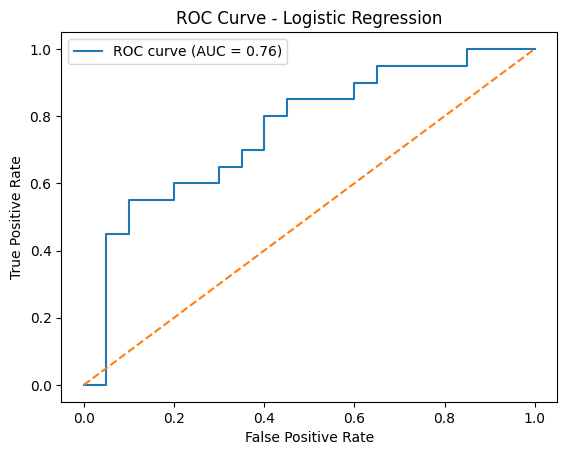

In [16]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()